In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import copy
import numpy as np

In [4]:
data = pd.read_csv(r'data\StudentsPerformance.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Создадим модель на изначальных данных, посмотрим какую точноть она получит, а потом попытаемся улучшить результат

In [6]:
data2 = data.copy()
data2["gender"] = pd.Categorical(data2["gender"]).codes
data2["race/ethnicity"] = pd.Categorical(data2["race/ethnicity"]).codes
data2["lunch"] = pd.Categorical(data2["lunch"]).codes
data2["test preparation course"] = pd.Categorical(data2["test preparation course"]).codes
data2["parental level of education"] = pd.Categorical(data2["parental level of education"]).codes
data2.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75


In [7]:
data_X = data2[['gender', 'parental level of education', 'test preparation course']]
data_Y = data2[['math score', 'reading score', 'writing score']]
X_train, x_test, Y_train, y_test = train_test_split(data_X, data_Y, test_size=20, random_state=42)


In [8]:
param_grid = {
    'n_estimators': [50, 100, 200],  # Количество деревьев в лесу
    'max_depth': [None, 10, 20, 30],  # Максимальная глубина дерева
    'min_samples_split': [2, 5, 10],  # Минимальное количество образцов для разделения узла
    'min_samples_leaf': [1, 2, 4]     # Минимальное количество образцов в листе
}

In [9]:
# model = RandomForestRegressor(random_state=42)
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv = 5, n_jobs= -1, scoring='neg_mean_squared_error')
# grid_search.fit(X_train, Y_train)


In [10]:
# # Лучшие параметры
# print("Best parameters found: ", grid_search.best_params_)

# # Получение модели с лучшими параметрами
# best_rf = grid_search.best_estimator_

# # Оценка на тестовых данных
# y_pred = best_rf.predict(x_test)

# # Вычисление MSE на тестовых данных
# mse = mean_squared_error(y_test, y_pred)
# print(f"Test Mean Squared Error: {mse}")

# # Прогнозы на основе среднего значения для каждой целевой переменной
# baseline_pred_math = np.full_like(y_test["math score"], np.mean(Y_train["math score"]), dtype=float)
# baseline_pred_reading = np.full_like(y_test["reading score"], np.mean(Y_train["reading score"]), dtype=float)
# baseline_pred_writing = np.full_like(y_test["writing score"], np.mean(Y_train["writing score"]), dtype=float)

# # Вычисление MSE для базовой модели
# baseline_mse_math = mean_squared_error(y_test["math score"], baseline_pred_math)
# baseline_mse_reading = mean_squared_error(y_test["reading score"], baseline_pred_reading)
# baseline_mse_writing = mean_squared_error(y_test["writing score"], baseline_pred_writing)

# # Вывод результатов
# print(f"Baseline MSE for Math Score: {baseline_mse_math}")
# print(f"Baseline MSE for Reading Score: {baseline_mse_reading}")
# print(f"Baseline MSE for Writing Score: {baseline_mse_writing}")
# print(f"Mean MSE: {(baseline_mse_math + baseline_mse_reading + baseline_mse_writing) / 3}")

### С этим закончили, сначала я использовал все столбцы для теста, потом пробовал разные вариации, данная вариация работает лучше всего, хотел бы заметить, что расса очень сильно ухудшает предсказание, ланч в меньшей степени, оставшиеся 3 признака хорошо влияет на предсказание, перед началом изучения данных, я хочу посмотреть насколько все таки близки предсказания.

In [11]:
# print(type(x_test), type(y_test), type(y_pred))

# # Создаём DataFrame из y_pred
# y_pred_df = pd.DataFrame(y_pred, columns=["Math predict", "Reading predict", "Writing predict"], index=y_test.index)

# # Теперь объединяем x_test, y_test и y_pred_df
# data_res = pd.concat([y_pred_df, y_test], axis=1)

# # Печатаем первые 10 строк
# print(data_res)

### Как можно заметить у модели плохая способность к предсказыванию, у нее просто близкие к среднему значения и она отклоняется лишь немного от него в нужную сторону.

### Теперь самостоятельно проанализируем данные и попробуем их преобразовать для лучших предсказания и возможно сами попробуем сделать вывод аналитически.

In [12]:
bins = range(0, 110, 10)
labels = [f'{i}-{i + 9}' for i in bins[:-1]]
labels[-1] = "90-100"
print(labels)

['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-100']


In [13]:
data["math_score_group"] = pd.cut(data["math score"], bins=bins, labels=labels, include_lowest=True)
data["reading_score_group"] = pd.cut(data["reading score"], bins=bins, labels=labels, include_lowest=True)
data["writing_score_group"] = pd.cut(data["writing score"], bins=bins, labels=labels, include_lowest=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   gender                       1000 non-null   object  
 1   race/ethnicity               1000 non-null   object  
 2   parental level of education  1000 non-null   object  
 3   lunch                        1000 non-null   object  
 4   test preparation course      1000 non-null   object  
 5   math score                   1000 non-null   int64   
 6   reading score                1000 non-null   int64   
 7   writing score                1000 non-null   int64   
 8   math_score_group             1000 non-null   category
 9   reading_score_group          1000 non-null   category
 10  writing_score_group          1000 non-null   category
dtypes: category(3), int64(3), object(5)
memory usage: 66.7+ KB


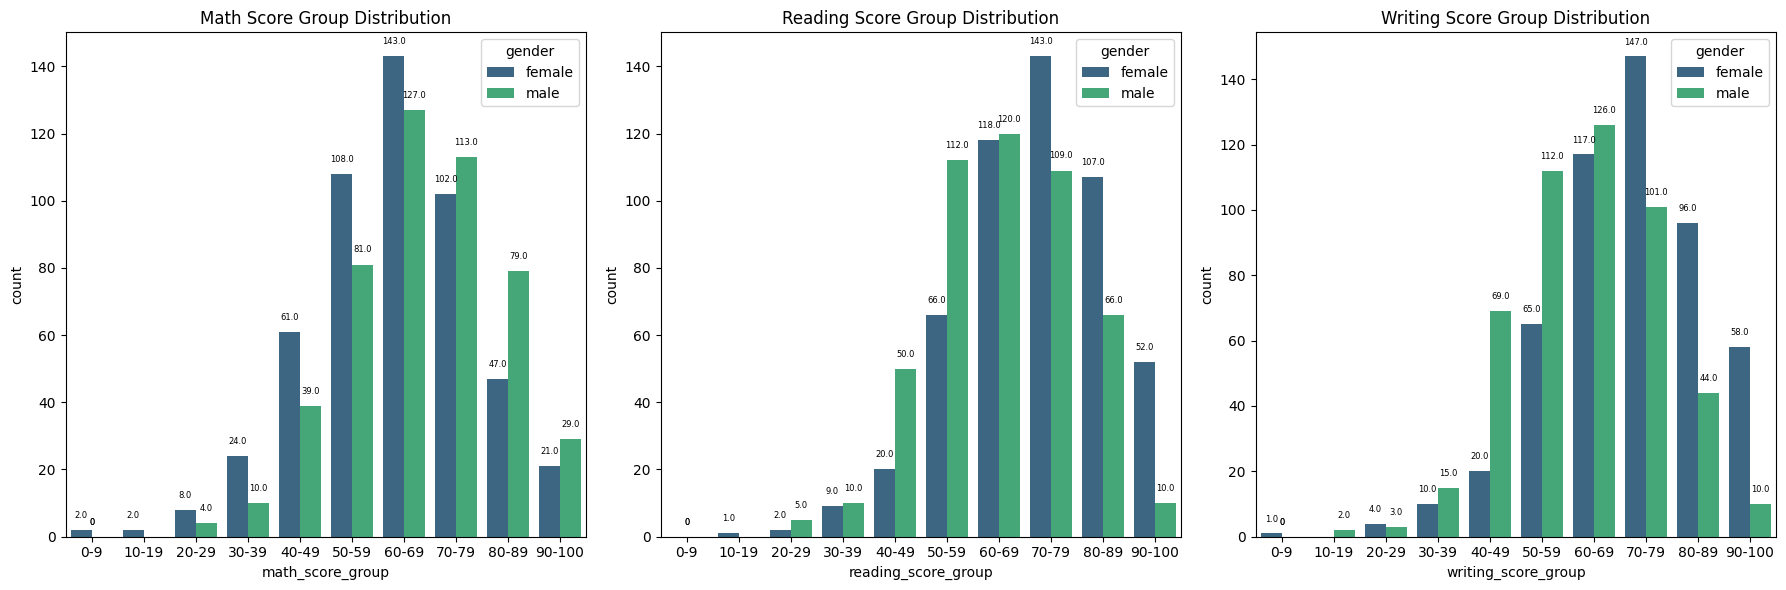

In [14]:
plt.figure(figsize=(18, 6))

# График для math_score_group
plt.subplot(1, 3, 1)
ax1 = sns.countplot(data=data, x="math_score_group", palette="viridis", hue="gender")
plt.title("Math Score Group Distribution")

# График для reading_score_group
plt.subplot(1, 3, 2)
ax2 = sns.countplot(data=data, x="reading_score_group", palette="viridis", hue="gender")
plt.title("Reading Score Group Distribution")

# График для writing_score_group
plt.subplot(1, 3, 3)
ax3 = sns.countplot(data=data, x="writing_score_group", palette="viridis", hue="gender")
plt.title("Writing Score Group Distribution")

def signatures(ax):
    for p in ax.patches:
        height = p.get_height()
        x = p.get_x() + p.get_width() / 2
        y = height + 3  
        ax.text(x, y, f'{height}', ha='center', va='bottom', fontsize=6)

signatures(ax1)
signatures(ax2)
signatures(ax3)

# Отображаем все графики
plt.tight_layout()
plt.show()


### Заметим, что девушки хуже справляются с математикой чем мужчины, но в чтении (вероятно литертуре) и в грамматике... лучше, так же замечу, что девушек больше, проверим

In [15]:
gender_count = data["gender"].value_counts()
print(gender_count)

gender
female    518
male      482
Name: count, dtype: int64


### Различие на самом деле есть, хотя не такое большое как я думал, хочу посмотреть на графики учитывая разницу в количестве людей

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   gender                       1000 non-null   object  
 1   race/ethnicity               1000 non-null   float64 
 2   parental level of education  1000 non-null   object  
 3   lunch                        1000 non-null   object  
 4   test preparation course      1000 non-null   object  
 5   math score                   1000 non-null   int64   
 6   reading score                1000 non-null   int64   
 7   writing score                1000 non-null   int64   
 8   math_score_group             1000 non-null   category
 9   reading_score_group          1000 non-null   category
 10  writing_score_group          1000 non-null   category
dtypes: category(3), float64(1), int64(3), object(4)
memory usage: 66.7+ KB


In [51]:
kol_female = 518
kol_male = 482

# Создание пустого DataFrame для хранения процентов
data_ = pd.DataFrame()

# Расчет процентов для math_score_group
gender_percentage = data.groupby('gender')['math_score_group'].value_counts(normalize=True).unstack()
data_["female_math_perc"] = gender_percentage.loc['female'] * 100
data_["male_math_perc"] = gender_percentage.loc['male'] * 100

# Расчет процентов для reading_score_group
gender_percentage = data.groupby('gender')['reading_score_group'].value_counts(normalize=True).unstack()
data_["female_reading_perc"] = gender_percentage.loc['female'] * 100
data_["male_reading_perc"] = gender_percentage.loc['male'] * 100

# Расчет процентов для writing_score_group
gender_percentage = data.groupby('gender')['writing_score_group'].value_counts(normalize=True).unstack()
data_["female_writing_perc"] = gender_percentage.loc['female'] * 100
data_["male_writing_perc"] = gender_percentage.loc['male'] * 100

# Информация о результатах
data_.info()

# Теперь данные в `data_` содержат проценты для каждой группы и гендера
print(data_)

<class 'pandas.core.frame.DataFrame'>
CategoricalIndex: 10 entries, 0-9 to 90-100
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   female_math_perc     10 non-null     float64
 1   male_math_perc       10 non-null     float64
 2   female_reading_perc  10 non-null     float64
 3   male_reading_perc    10 non-null     float64
 4   female_writing_perc  10 non-null     float64
 5   male_writing_perc    10 non-null     float64
dtypes: float64(6)
memory usage: 1.0 KB
                  female_math_perc  male_math_perc  female_reading_perc  \
math_score_group                                                          
0-9                       0.386100        0.000000             0.000000   
10-19                     0.386100        0.000000             0.193050   
20-29                     1.544402        0.829876             0.386100   
30-39                     4.633205        2.074689             1.737452

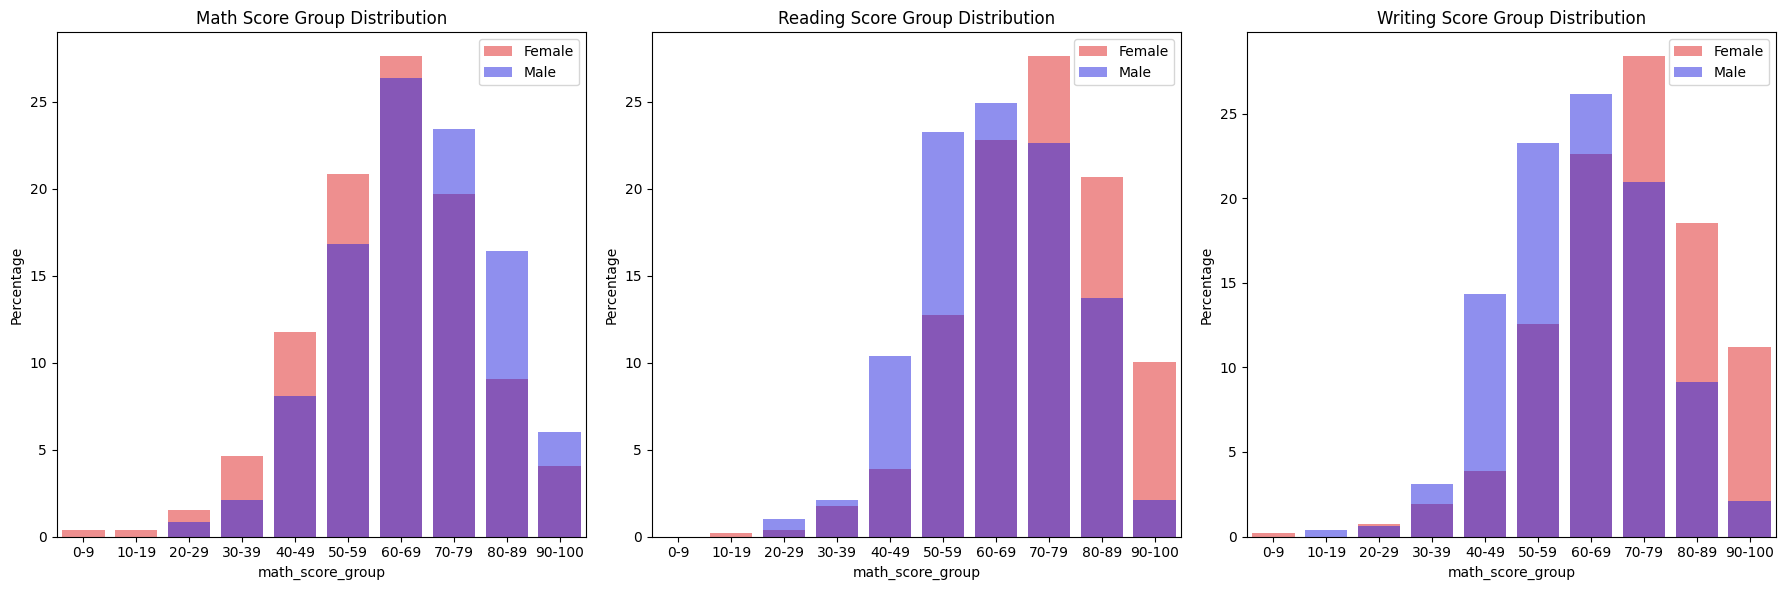

In [52]:
plt.figure(figsize=(18, 6))

# График для math_score_group с прозрачностью
plt.subplot(1, 3, 1)
sns.barplot(x=data_.index, y=data_['female_math_perc'], color='red', label="Female", alpha=0.5)  
sns.barplot(x=data_.index, y=data_['male_math_perc'], color='blue', label="Male", alpha=0.5)  
plt.title("Math Score Group Distribution")
plt.ylabel("Percentage")
plt.legend()

# График для reading_score_group с прозрачностью
plt.subplot(1, 3, 2)
sns.barplot(x=data_.index, y=data_['female_reading_perc'], color='red', label="Female", alpha=0.5)
sns.barplot(x=data_.index, y=data_['male_reading_perc'], color='blue', label="Male", alpha=0.5)
plt.title("Reading Score Group Distribution")
plt.ylabel("Percentage")
plt.legend()

# График для writing_score_group с прозрачностью
plt.subplot(1, 3, 3)
sns.barplot(x=data_.index, y=data_['female_writing_perc'], color='red', label="Female", alpha=0.5)
sns.barplot(x=data_.index, y=data_['male_writing_perc'], color='blue', label="Male", alpha=0.5)
plt.title("Writing Score Group Distribution")
plt.ylabel("Percentage")
plt.legend()

# Отображаем все графики
plt.tight_layout()
plt.show()



In [53]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   gender                       1000 non-null   object  
 1   race/ethnicity               1000 non-null   float64 
 2   parental level of education  1000 non-null   object  
 3   lunch                        1000 non-null   object  
 4   test preparation course      1000 non-null   object  
 5   math score                   1000 non-null   int64   
 6   reading score                1000 non-null   int64   
 7   writing score                1000 non-null   int64   
 8   math_score_group             1000 non-null   category
 9   reading_score_group          1000 non-null   category
 10  writing_score_group          1000 non-null   category
dtypes: category(3), float64(1), int64(3), object(4)
memory usage: 66.7+ KB


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math_score_group,reading_score_group,writing_score_group
0,female,0.5,bachelor's degree,standard,none,72,72,74,70-79,70-79,70-79
1,female,0.5,some college,standard,completed,69,90,88,60-69,80-89,80-89
2,female,0.5,master's degree,standard,none,90,95,93,80-89,90-100,90-100
3,male,0.0,associate's degree,free/reduced,none,47,57,44,40-49,50-59,40-49
4,male,0.5,some college,standard,none,76,78,75,70-79,70-79,70-79


Text(0.5, 1.0, 'Math score by groups of race')

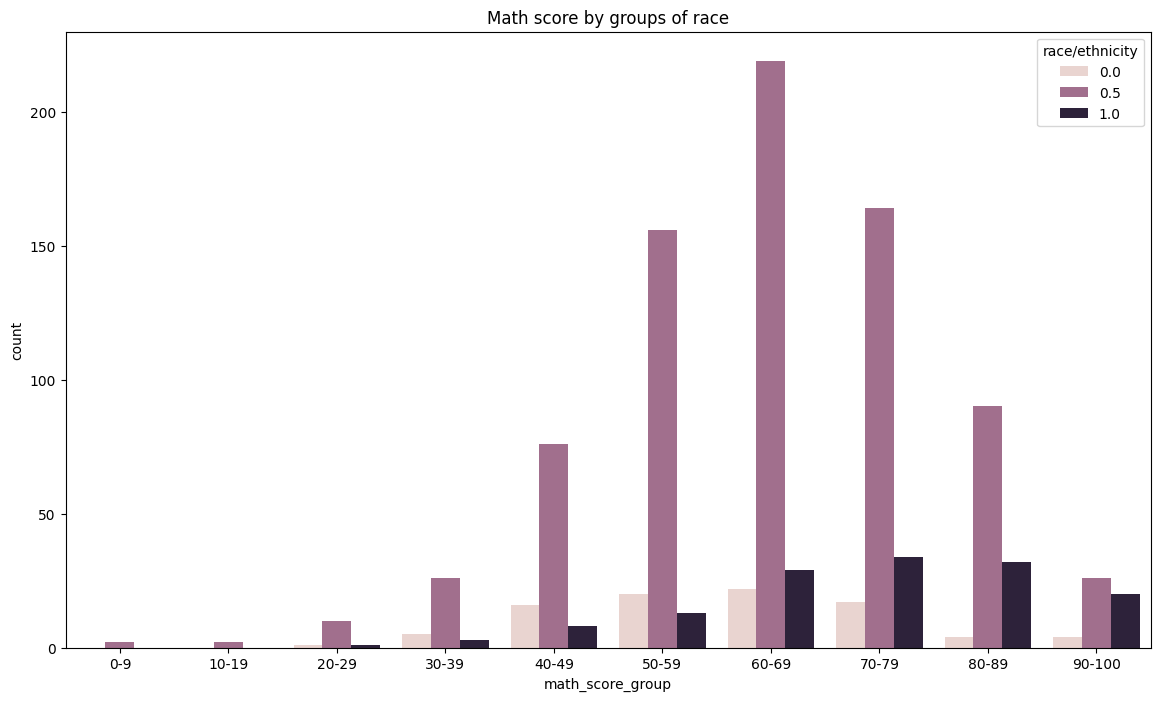

In [54]:
plt.figure(figsize=(14, 8))
sns.countplot(data = data, x = data["math_score_group"], hue = data["race/ethnicity"])
plt.title("Math score by groups of race")

In [55]:
group_value = data["race/ethnicity"].value_counts()
print("Количество людей в каждой группе:", group_value, sep = "\n")
print("\n","Всего людей: ", sum(group_value), sep = "\n")

Количество людей в каждой группе:
race/ethnicity
0.5    771
1.0    140
0.0     89
Name: count, dtype: int64


Всего людей: 
1000


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   gender                       1000 non-null   object  
 1   race/ethnicity               1000 non-null   float64 
 2   parental level of education  1000 non-null   object  
 3   lunch                        1000 non-null   object  
 4   test preparation course      1000 non-null   object  
 5   math score                   1000 non-null   int64   
 6   reading score                1000 non-null   int64   
 7   writing score                1000 non-null   int64   
 8   math_score_group             1000 non-null   category
 9   reading_score_group          1000 non-null   category
 10  writing_score_group          1000 non-null   category
dtypes: category(3), float64(1), int64(3), object(4)
memory usage: 66.7+ KB


    race/ethnicity  percentage
0              0.0    0.000000
1              0.0    0.000000
2              0.0    1.123596
3              0.0    5.617978
4              0.0   17.977528
5              0.0   22.471910
6              0.0   24.719101
7              0.0   19.101124
8              0.0    4.494382
9              0.0    4.494382
10             0.5    0.259403
11             0.5    0.259403
12             0.5    1.297017
13             0.5    3.372244
14             0.5    9.857328
15             0.5   20.233463
16             0.5   28.404669
17             0.5   21.271077
18             0.5   11.673152
19             0.5    3.372244
20             1.0    0.000000
21             1.0    0.000000
22             1.0    0.714286
23             1.0    2.142857
24             1.0    5.714286
25             1.0    9.285714
26             1.0   20.714286
27             1.0   24.285714
28             1.0   22.857143
29             1.0   14.285714


C:\Users\Alexey\AppData\Local\Temp\ipykernel_16012\2656039407.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_counts = data.groupby(["race/ethnicity", "math_score_group"]).size().reset_index(name="count")


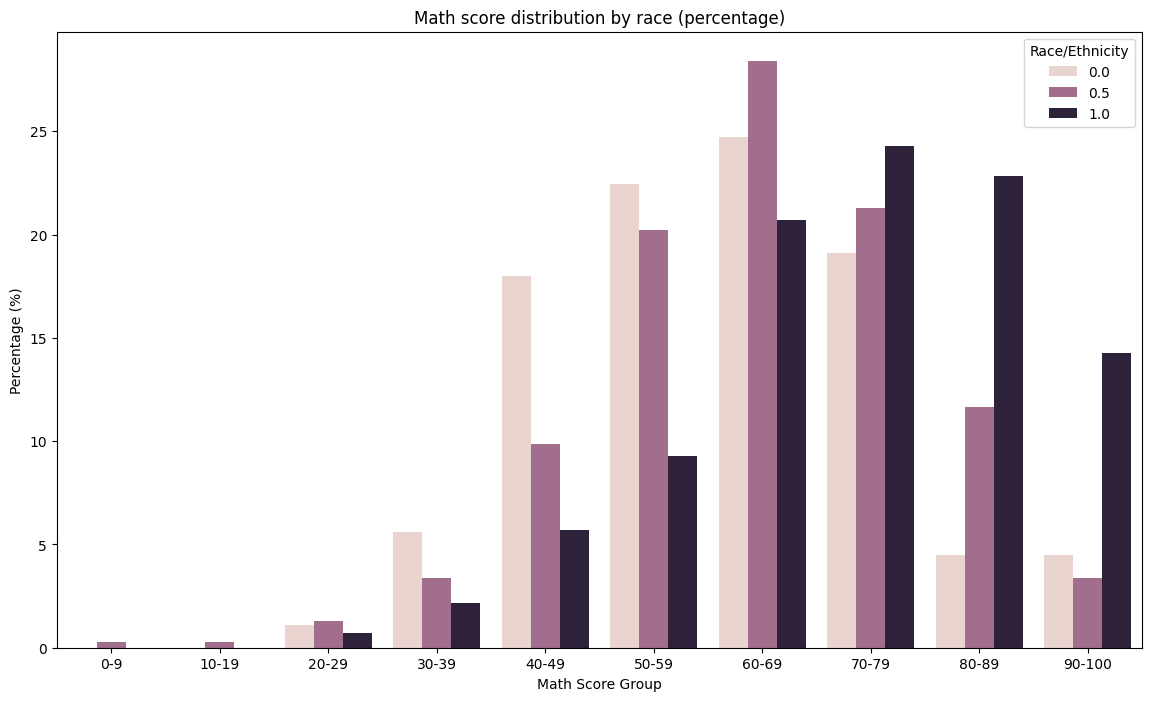

In [57]:
# Подсчет количества студентов в каждой группе оценок и расы
group_counts = data.groupby(["race/ethnicity", "math_score_group"]).size().reset_index(name="count")

# Нормализация: делим на общее количество студентов в каждой расовой группе
group_totals = data["race/ethnicity"].value_counts()
group_counts["percentage"] = group_counts.apply(lambda row: (row["count"] / group_totals[row["race/ethnicity"]]) * 100, axis=1)
print(group_counts[["race/ethnicity","percentage"]])

# Визуализация
plt.figure(figsize=(14, 8))
sns.barplot(data=group_counts, x="math_score_group", y="percentage", hue="race/ethnicity")

plt.title("Math score distribution by race (percentage)")
plt.ylabel("Percentage (%)")
plt.xlabel("Math Score Group")
plt.legend(title="Race/Ethnicity")
plt.show()


In [58]:
print(data[data['race/ethnicity'] == "group E"].count())
print(data[data['race/ethnicity'] == "group A"].count())


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
math_score_group               0
reading_score_group            0
writing_score_group            0
dtype: int64
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
math_score_group               0
reading_score_group            0
writing_score_group            0
dtype: int64


#### Из графика выше видно, что группа E сдает экзамены лучше других, а группа А чуть хуже, в целом раса слабо подходит для постановления предсказаний, хотя попробуем еще рассмотреть по гендеру.

C:\Users\Alexey\AppData\Local\Temp\ipykernel_16012\141429265.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_counts = data.groupby(["race/ethnicity", "math_score_group", "gender"]).size().reset_index(name="count")


<Figure size 1600x800 with 0 Axes>

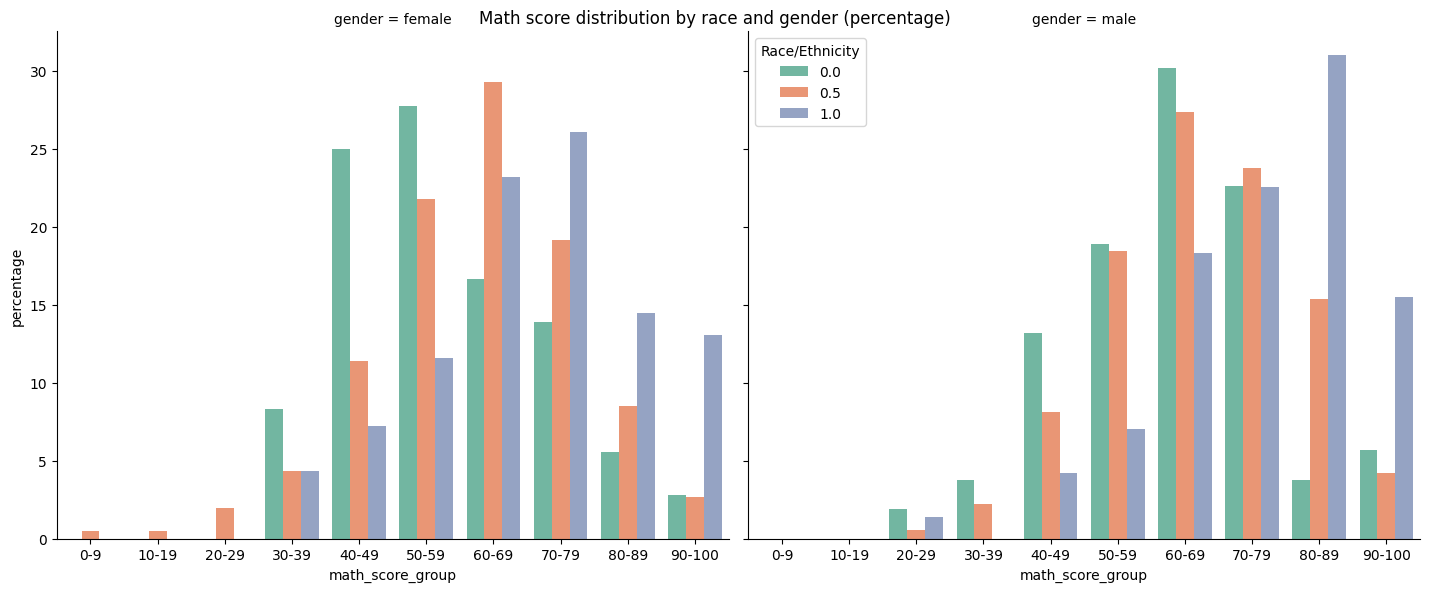

In [59]:
# Группировка по race/ethnicity, math_score_group и gender, считаем количество студентов
group_counts = data.groupby(["race/ethnicity", "math_score_group", "gender"]).size().reset_index(name="count")

# Общая численность в каждой комбинации race/ethnicity + gender
group_totals = data.groupby(["race/ethnicity", "gender"]).size()

# Нормализация: переводим в проценты внутри каждой группы race + gender
group_counts["percentage"] = group_counts.apply(lambda row: (row["count"] / group_totals[row["race/ethnicity"], row["gender"]]) * 100, axis=1)

# Визуализация, добавляем разделение по полу
plt.figure(figsize=(16, 8))

# Разделение по полу (чтобы отобразить два графика отдельно)
g = sns.FacetGrid(group_counts, col="gender", height=6, aspect=1.2)
g.map_dataframe(sns.barplot, x="math_score_group", y="percentage", hue="race/ethnicity", dodge=True, palette="Set2")

plt.suptitle("Math score distribution by race and gender (percentage)", fontsize=12)
plt.legend(title="Race/Ethnicity")
plt.show()


#### Разделение по полу тоже не дало результатов, в целом это было ожидаемо, так как при обучении подели на изначальных данных раса только ухудшала модель. Возможно добавив процентное соотношение в данные модель и станет чуть лучше работать, хотя предположу, что станет только хуже, для точного опрделения давайте посмотрим как будет по другим предметам.

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   gender                       1000 non-null   object  
 1   race/ethnicity               1000 non-null   float64 
 2   parental level of education  1000 non-null   object  
 3   lunch                        1000 non-null   object  
 4   test preparation course      1000 non-null   object  
 5   math score                   1000 non-null   int64   
 6   reading score                1000 non-null   int64   
 7   writing score                1000 non-null   int64   
 8   math_score_group             1000 non-null   category
 9   reading_score_group          1000 non-null   category
 10  writing_score_group          1000 non-null   category
dtypes: category(3), float64(1), int64(3), object(4)
memory usage: 66.7+ KB


C:\Users\Alexey\AppData\Local\Temp\ipykernel_16012\1479605051.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_counts = data.groupby(["race/ethnicity", "reading_score_group", "gender"]).size().reset_index(name="count")


<Figure size 1600x800 with 0 Axes>

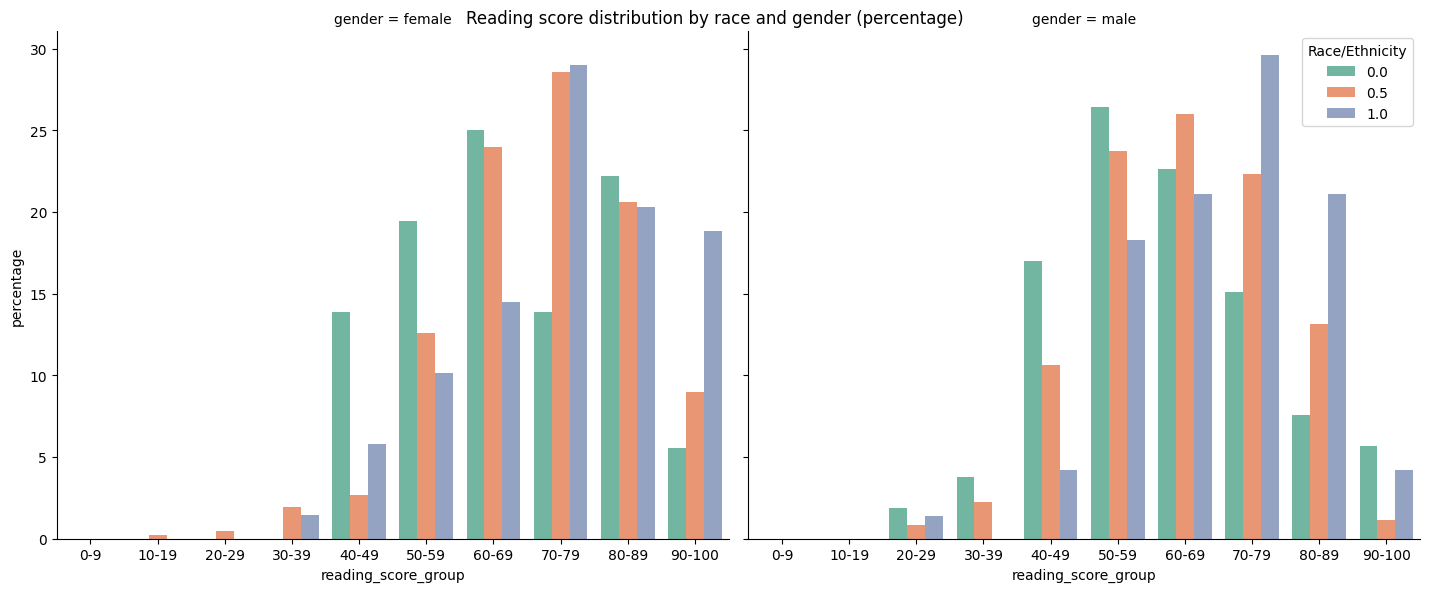

In [61]:
group_counts = data.groupby(["race/ethnicity", "reading_score_group", "gender"]).size().reset_index(name="count")

group_totals = data.groupby(["race/ethnicity", "gender"]).size()

group_counts["percentage"] = group_counts.apply(lambda row: (row["count"] / group_totals[row["race/ethnicity"], row["gender"]]) * 100, axis=1)

plt.figure(figsize=(16, 8))

g = sns.FacetGrid(group_counts, col="gender", height=6, aspect=1.2)
g.map_dataframe(sns.barplot, x="reading_score_group", y="percentage", hue="race/ethnicity", dodge=True, palette="Set2")

plt.suptitle("Reading score distribution by race and gender (percentage)", fontsize=12)
plt.legend(title="Race/Ethnicity")
plt.show()

#### Опять же группа E сдает чуть лучше, а А хуже, 2 другие группы примерно одинаково идут

C:\Users\Alexey\AppData\Local\Temp\ipykernel_16012\3949211613.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_counts = data.groupby(["race/ethnicity", "writing_score_group", "gender"]).size().reset_index(name="count")


<Figure size 1600x800 with 0 Axes>

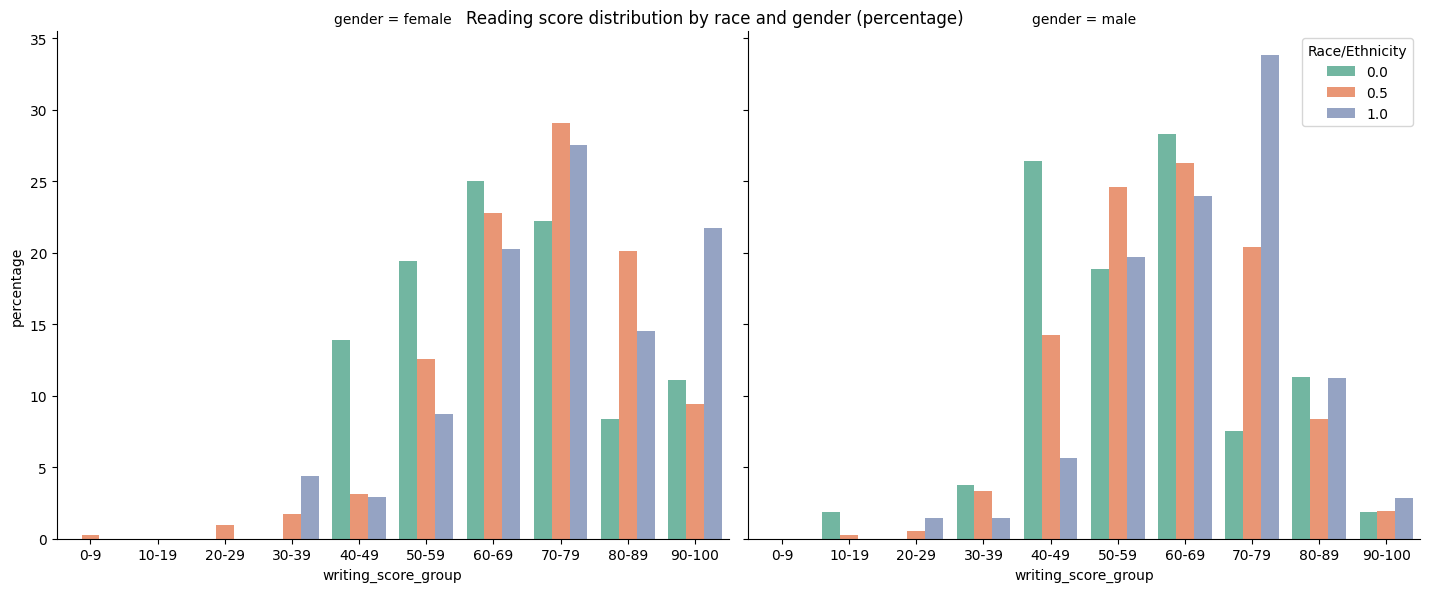

In [62]:
group_counts = data.groupby(["race/ethnicity", "writing_score_group", "gender"]).size().reset_index(name="count")

group_totals = data.groupby(["race/ethnicity", "gender"]).size()

group_counts["percentage"] = group_counts.apply(lambda row: (row["count"] / group_totals[row["race/ethnicity"], row["gender"]]) * 100, axis=1)

plt.figure(figsize=(16, 8))

g = sns.FacetGrid(group_counts, col="gender", height=6, aspect=1.2)
g.map_dataframe(sns.barplot, x="writing_score_group", y="percentage", hue="race/ethnicity", dodge=True, palette="Set2")

plt.suptitle("Reading score distribution by race and gender (percentage)", fontsize=12)
plt.legend(title="Race/Ethnicity")
plt.show()

#### Аналогично. Следовательно, я бы подкорректировал данные, чтобы это как-то учитывалось.

In [63]:
data["race/ethnicity"] = data["race/ethnicity"].apply(lambda x: 1 if x == "group E" else 0 if x == "group A" else 0.5)
print(data[data["race/ethnicity"] != 0.5])

Empty DataFrame
Columns: [gender, race/ethnicity, parental level of education, lunch, test preparation course, math score, reading score, writing score, math_score_group, reading_score_group, writing_score_group]
Index: []


#### Теперь проанализируем информацию через образование родителей

In [64]:
print(data["parental level of education"].value_counts())

parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64


<Axes: xlabel='math_score_group', ylabel='count'>

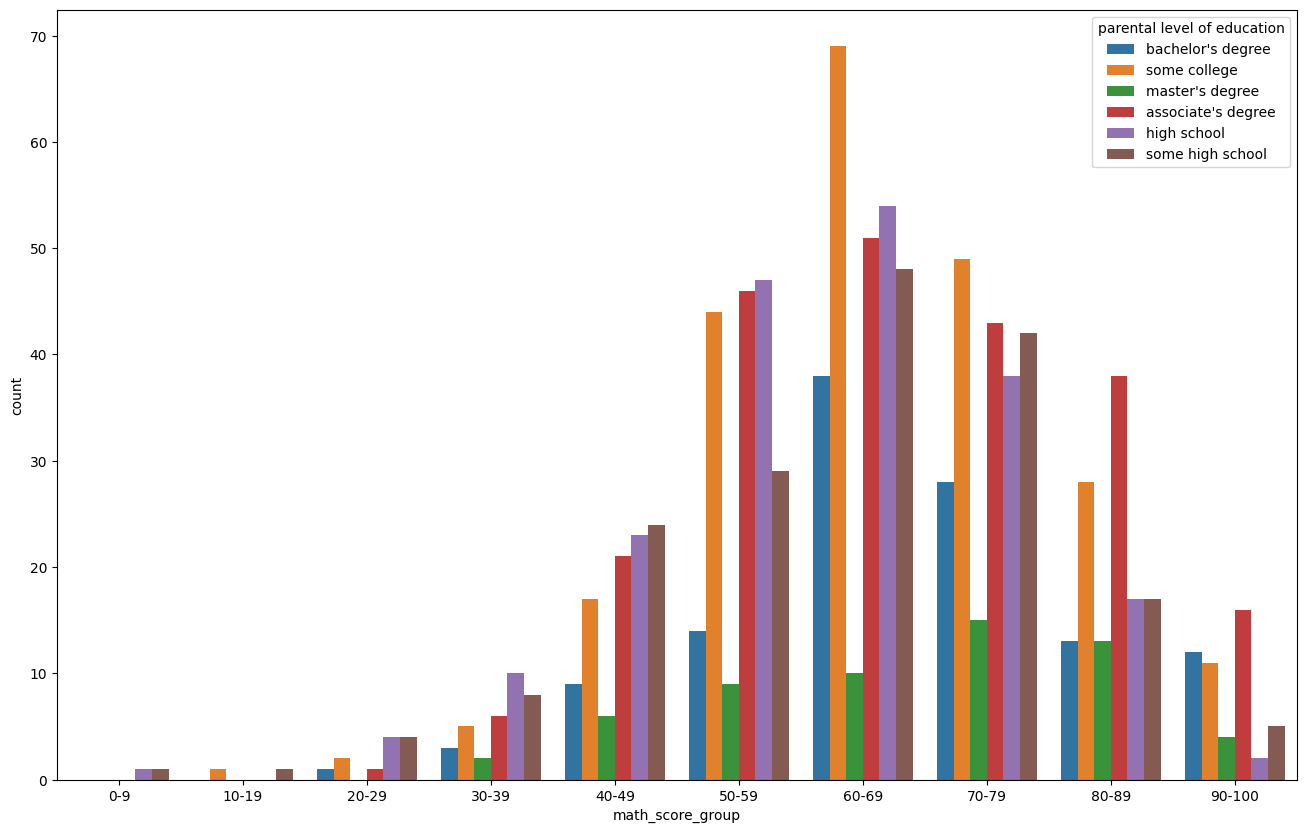

In [65]:
plt.figure(figsize = (16, 10))
sns.countplot(data=data, x = data["math_score_group"], hue = data["parental level of education"])

#### Опять же трудно что-то понячть, так как нет нормализации, видно, что "зеленых" довольно мало, что красные смещены в сторону высових баллов, рассмотрим графики в процентных соотношениях

C:\Users\Alexey\AppData\Local\Temp\ipykernel_16012\284554114.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_counts = data.groupby(["parental level of education", "math_score_group"]).size().reset_index(name="count")


parental level of education
associate's degree    100.0
bachelor's degree     100.0
high school           100.0
master's degree       100.0
some college          100.0
some high school      100.0
Name: percentage, dtype: float64


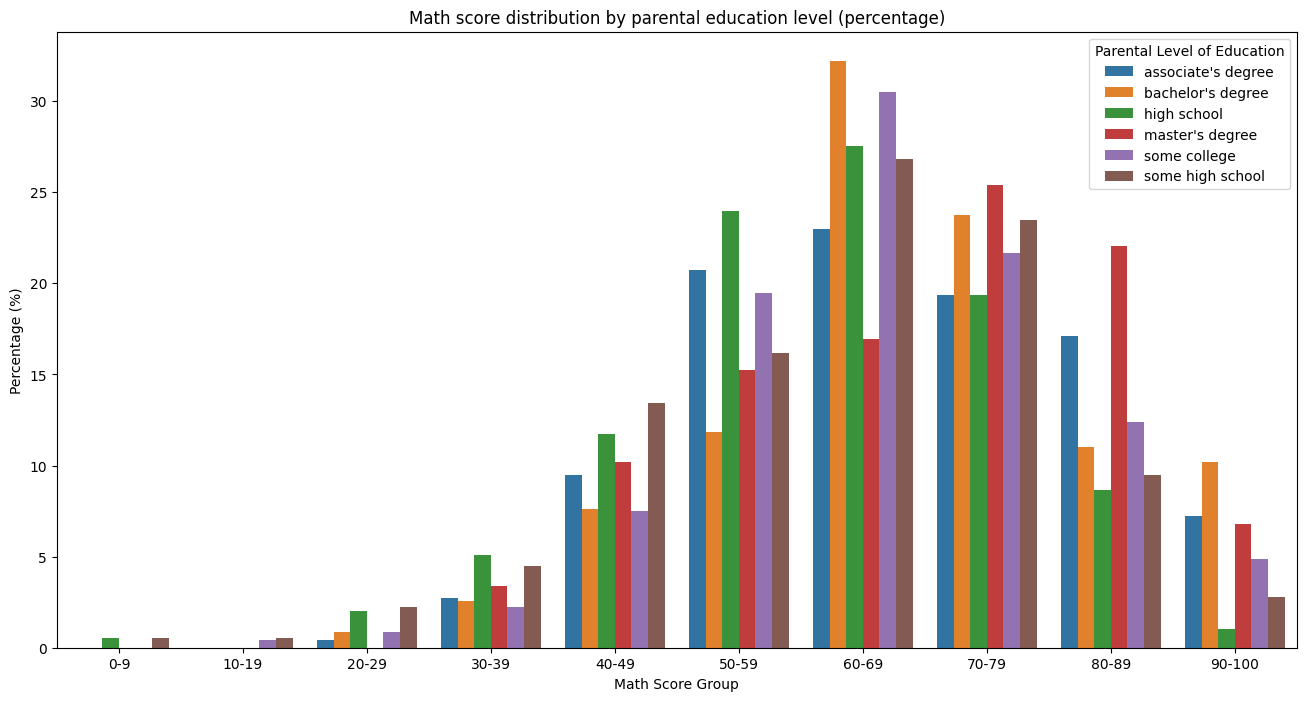

In [66]:
group_counts = data.groupby(["parental level of education", "math_score_group"]).size().reset_index(name="count")

group_totals = data.groupby("parental level of education").size()

group_counts["percentage"] = group_counts.apply(
    lambda row: (row["count"] / group_totals[row["parental level of education"]]) * 100, axis=1
)

print(group_counts.groupby("parental level of education")["percentage"].sum())

plt.figure(figsize=(16, 8))
sns.barplot(data=group_counts, x="math_score_group", y="percentage", hue="parental level of education")

plt.title("Math score distribution by parental education level (percentage)")
plt.ylabel("Percentage (%)")
plt.xlabel("Math Score Group")
plt.legend(title="Parental Level of Education")

plt.show()


#### Тут мы видим, что если у родителей master's degree или же associate's то результаты выше, а с high school ниже среднего.

C:\Users\Alexey\AppData\Local\Temp\ipykernel_16012\1854952543.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_counts = data.groupby(["parental level of education", "reading_score_group"]).size().reset_index(name="count")


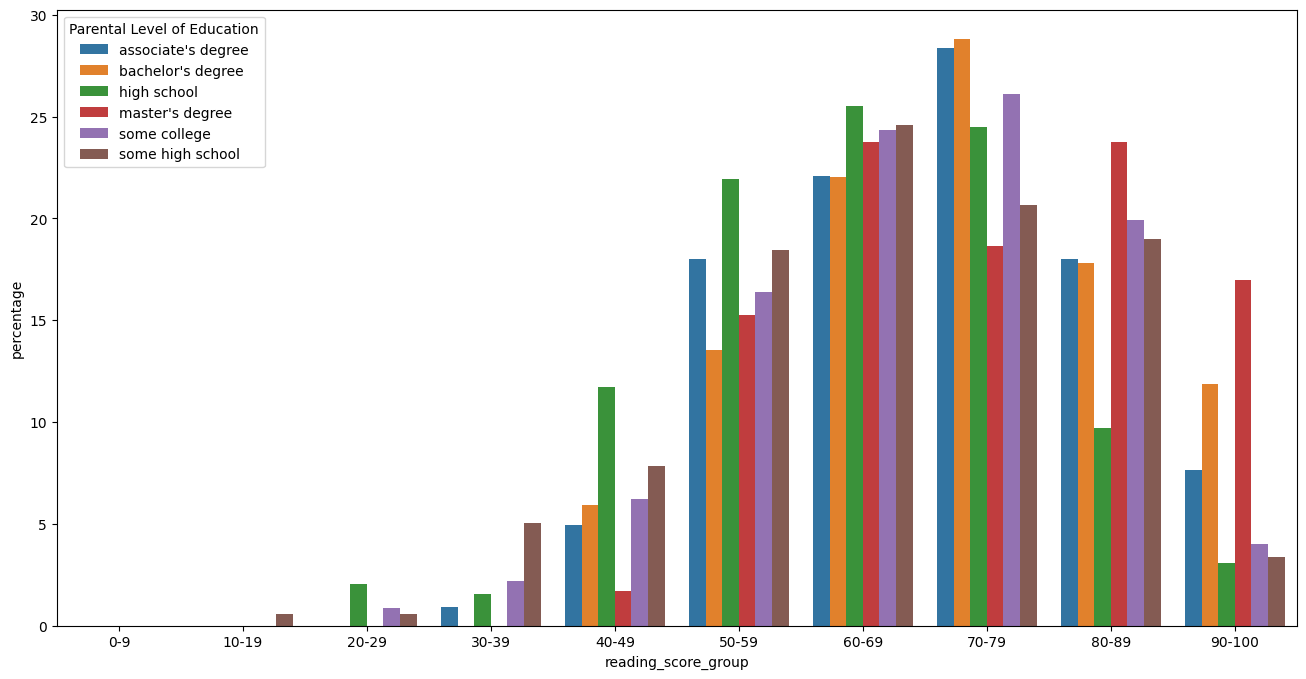

In [67]:
group_counts = data.groupby(["parental level of education", "reading_score_group"]).size().reset_index(name="count")

group_totals = data.groupby("parental level of education").size()

group_counts["percentage"] = group_counts.apply(
    lambda row: (row["count"] / group_totals[row["parental level of education"]]) * 100, axis=1
)

plt.figure(figsize=(16, 8))
sns.barplot(data=group_counts, x="reading_score_group", y="percentage", hue="parental level of education")

plt.legend(title="Parental Level of Education")

plt.show()

C:\Users\Alexey\AppData\Local\Temp\ipykernel_16012\2699721937.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_counts = data.groupby(["parental level of education", "writing_score_group"]).size().reset_index(name="count")


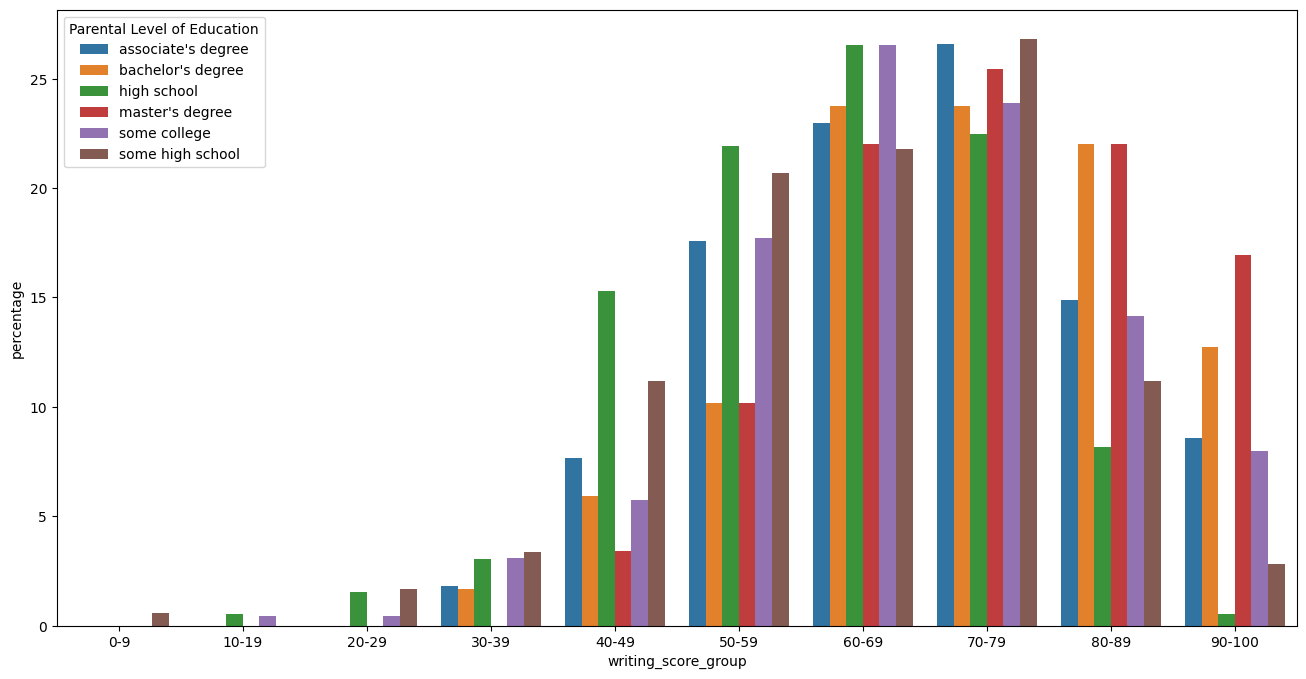

In [68]:
group_counts = data.groupby(["parental level of education", "writing_score_group"]).size().reset_index(name="count")

group_totals = data.groupby("parental level of education").size()

group_counts["percentage"] = group_counts.apply(
    lambda row: (row["count"] / group_totals[row["parental level of education"]]) * 100, axis=1
)

plt.figure(figsize=(16, 8))
sns.barplot(data=group_counts, x="writing_score_group", y="percentage", hue="parental level of education")

plt.legend(title="Parental Level of Education")

plt.show()

#### С бакалаворской степенью тоже как правило сдают лучше, а с associate's degree лишь чуть лучше некоторого колледжа.

#### Возможно можно использовать K-means в качестве модели.

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   gender                       1000 non-null   object  
 1   race/ethnicity               1000 non-null   float64 
 2   parental level of education  1000 non-null   object  
 3   lunch                        1000 non-null   object  
 4   test preparation course      1000 non-null   object  
 5   math score                   1000 non-null   int64   
 6   reading score                1000 non-null   int64   
 7   writing score                1000 non-null   int64   
 8   math_score_group             1000 non-null   category
 9   reading_score_group          1000 non-null   category
 10  writing_score_group          1000 non-null   category
dtypes: category(3), float64(1), int64(3), object(4)
memory usage: 66.7+ KB


#### Осталось проанализировать как влияет обед и тест перед экзаменом

In [70]:
data["lunch"].value_counts()

lunch
standard        645
free/reduced    355
Name: count, dtype: int64

C:\Users\Alexey\AppData\Local\Temp\ipykernel_16012\3964130081.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_counts = data.groupby(["lunch", "math_score_group"]).size().reset_index(name="counts")


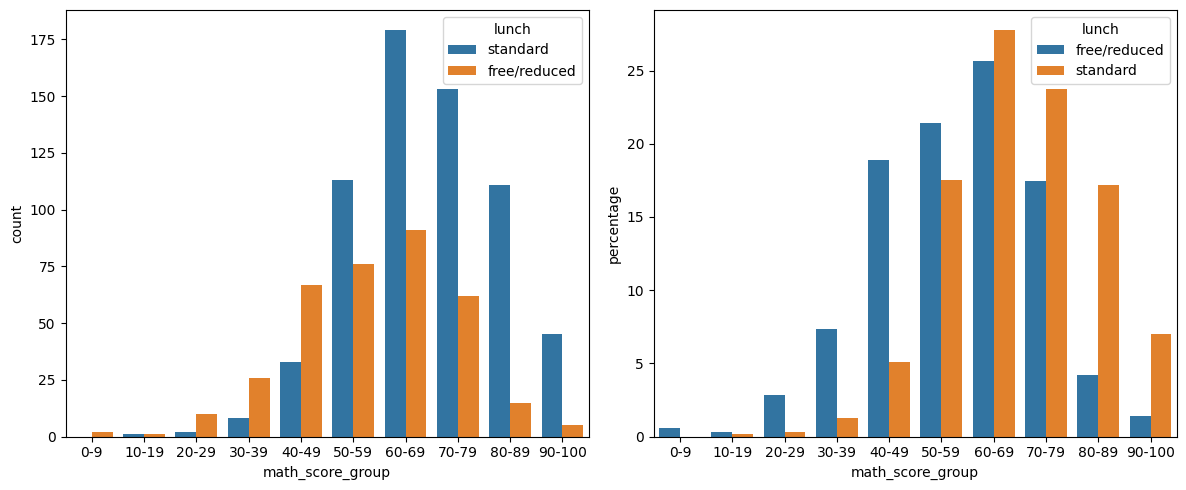

In [71]:
group_counts = data.groupby(["lunch", "math_score_group"]).size().reset_index(name="counts")
group_kol_human = data.groupby("lunch").size()
group_counts["percentage"] = group_counts.apply(lambda x: x["counts"] / group_kol_human[x["lunch"]] * 100, axis=1)

# Создание графиков
plt.figure(figsize=(12, 5))

# Первый график (количество учеников в каждой группе)
plt.subplot(1, 2, 1)
sns.countplot(data=data, x="math_score_group", hue="lunch")

# Второй график (процентное соотношение)
plt.subplot(1, 2, 2)
sns.barplot(data=group_counts, x="math_score_group", y="percentage", hue="lunch")

plt.tight_layout()  # Избегаем наложения графиков
plt.show()


#### Как мы видим, те кто хорошо поел лучше справились с экзаменом(значительно) запомним это, в дальнейшем используем данный атрибут для обучения.

In [73]:
data["test preparation course"].value_counts()

test preparation course
none         642
completed    358
Name: count, dtype: int64

C:\Users\Alexey\AppData\Local\Temp\ipykernel_16012\1142657271.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_counts = data.groupby(["test preparation course", "math_score_group"]).size().reset_index(name="counts")
C:\Users\Alexey\AppData\Local\Temp\ipykernel_16012\1142657271.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_counts = data.groupby(["test preparation course", "reading_score_group"]).size().reset_index(name="counts")
C:\Users\Alexey\AppData\Local\Temp\ipykernel_16012\1142657271.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a f

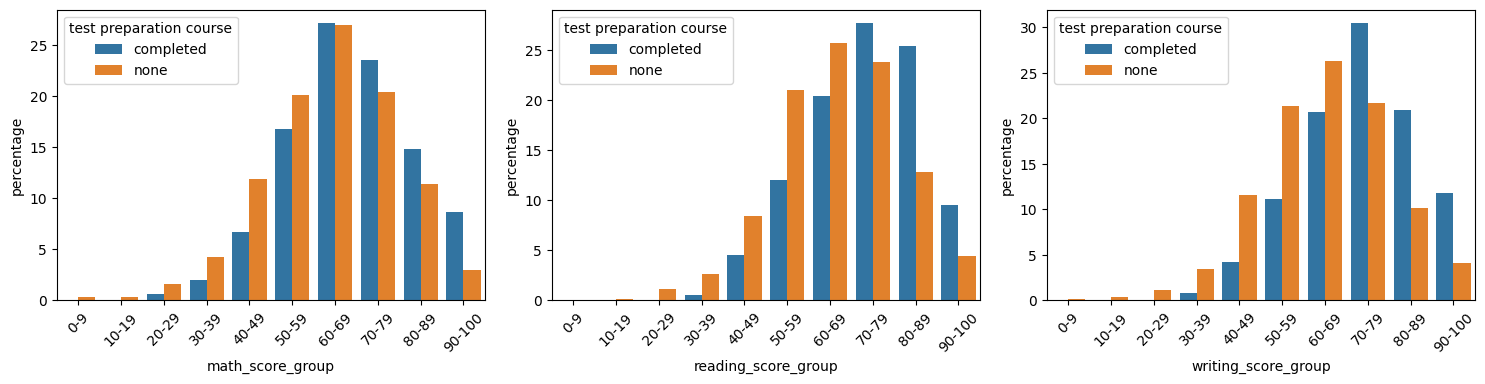

In [83]:
group_counts = data.groupby(["test preparation course", "math_score_group"]).size().reset_index(name="counts")
group_kol_human = data.groupby("test preparation course").size()
group_counts["percentage"] = group_counts.apply(lambda x: x["counts"] / group_kol_human[x["test preparation course"]] * 100, axis=1)

# Создание графиков
plt.figure(figsize=(15, 7))

plt.subplot(2, 3, 1)
sns.barplot(data=group_counts, x="math_score_group", y="percentage", hue="test preparation course")
plt.xticks(rotation=45)

group_counts = data.groupby(["test preparation course", "reading_score_group"]).size().reset_index(name="counts")
group_kol_human = data.groupby("test preparation course").size()
group_counts["percentage"] = group_counts.apply(lambda x: x["counts"] / group_kol_human[x["test preparation course"]] * 100, axis=1)

plt.subplot(2, 3, 2)
sns.barplot(data=group_counts, x="reading_score_group", y="percentage", hue="test preparation course")
plt.xticks(rotation=45)

group_counts = data.groupby(["test preparation course", "writing_score_group"]).size().reset_index(name="counts")
group_kol_human = data.groupby("test preparation course").size()
group_counts["percentage"] = group_counts.apply(lambda x: x["counts"] / group_kol_human[x["test preparation course"]] * 100, axis=1)

plt.subplot(2, 3, 3)
sns.barplot(data=group_counts, x="writing_score_group", y="percentage", hue="test preparation course")
plt.xticks(rotation=45)

plt.tight_layout()  # Избегаем наложения графиков
plt.show()
